In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

https://towardsdatascience.com/stop-using-pandas-get-dummies-for-feature-encoding-5d2cd07cb4fc

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/#h2_5

https://www.youtube.com/watch?v=EItlUEPCIzM

https://www.datacamp.com/community/tutorials/k-means-clustering-python

https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009824&gclid=CjwKCAiA1aiMBhAUEiwACw25MUbPKKtse7jriSObzy-AY5h-YRNG-hTwB8FaZDkxmGaQb3X8GoX2NxoCxNwQAvD_BwE

In [2]:
aisles = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/aisles.csv')
departments = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/departments.csv')
order_products_prior = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__prior.csv')
order_products_train = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__train.csv')
orders = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/orders.csv')
products = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/products.csv')

In [3]:

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:

order_prior = pd.merge(order_products_prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [7]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
_mt = pd.merge(order_products_prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [10]:
mt['product_name'].value_counts()[0:10]

Banana                    8919
Bag of Organic Bananas    7143
Organic Strawberries      4893
Organic Baby Spinach      4542
Organic Hass Avocado      3989
Organic Avocado           3221
Large Lemon               2849
Strawberries              2651
Organic Raspberries       2602
Limes                     2570
Name: product_name, dtype: int64

In [11]:
len(mt['product_name'].unique())


30778

In [12]:
order_products_prior.shape

(603635, 4)

In [13]:

mtfull = pd.merge(mt,departments,on=['department_id','department_id'])

mtfull.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [14]:

mtfull_drop = mtfull.drop(['order_id', 'product_id','aisle_id'], axis = 1)

In [15]:
mtfull_drop.head()

,add_to_cart_order,reordered,product_name,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,1,Organic Egg Whites,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,5,0,Organic Egg Whites,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,13,0,Organic Egg Whites,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,5,1,Organic Egg Whites,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,28,1,Organic Egg Whites,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [16]:
mtfull_drop.drop('department_id',axis='columns', inplace=True)

In [17]:
mtfull_drop.head()

,add_to_cart_order,reordered,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,1,Organic Egg Whites,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,5,0,Organic Egg Whites,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,13,0,Organic Egg Whites,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,5,1,Organic Egg Whites,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,28,1,Organic Egg Whites,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [18]:
mtfull_drop.shape

(603635, 11)

In [19]:
### remove random rows due to memory
remove_n = 600000
drop_indices = np.random.choice(mtfull_drop.index, remove_n, replace=False)
df_subset = mtfull_drop.drop(drop_indices)

In [20]:
df_subset.shape

(3635, 11)

In [21]:
import category_encoders as ce

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=('product_name','eval_set','aisle','department'),handle_unknown='return_nan',return_df=True,use_cat_names=True)


In [22]:
df_subset

,add_to_cart_order,reordered,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
165,6,1,Organic Egg Whites,165680,prior,6,1,16,26.0,eggs,dairy eggs
292,2,0,Organic Large Brown Grade AA Cage Free Eggs,9399,prior,11,4,10,30.0,eggs,dairy eggs
343,5,0,Brown Fertile Large Grade AA Eggs,97401,prior,14,6,2,5.0,eggs,dairy eggs
367,15,1,Organic Egg Whites,108375,prior,9,2,18,27.0,eggs,dairy eggs
473,9,1,Organic Grade A Large Brown Eggs,142186,prior,8,0,11,4.0,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
602642,1,1,Frontier Whiskey,5183,prior,9,2,12,15.0,spirits,alcohol
602730,1,1,Vodka 80 Proof,14808,prior,3,6,12,4.0,spirits,alcohol
602921,4,1,Sauvignon Blanc,19253,prior,15,4,11,7.0,white wines,alcohol
603350,2,1,Chardonnay Wine,99071,prior,5,5,17,4.0,white wines,alcohol


In [23]:
df_subset = df_subset.dropna()

#### Clustering 

In [24]:
len(df_subset['aisle'].unique())


128

In [25]:

df_subset['aisle'].value_counts()[0:10]

fresh fruits                     397
fresh vegetables                 368
packaged vegetables fruits       176
yogurt                           138
packaged cheese                  107
milk                              92
water seltzer sparkling water     83
refrigerated                      69
ice cream ice                     61
chips pretzels                    61
Name: aisle, dtype: int64

In [26]:

cust_prod = pd.crosstab(df_subset['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
cust_prod.shape


(3182, 126)

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(cust_prod)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(cust_prod)
print(centers)

[[ 4.37254045e-04  5.24704854e-03  4.37254045e-04  1.74901618e-02
   1.74901618e-03  1.39921294e-02  1.31176213e-03  4.37254045e-04
   2.18627022e-03  1.31176213e-03  2.57979886e-02  1.31176213e-02
   2.18627022e-03  8.74508089e-04  8.74508089e-04  5.24704854e-03
   9.61958898e-03  1.61783997e-02  3.49803236e-03  1.22431132e-02
   9.18233494e-03  1.74901618e-03  2.18627022e-03  2.09881941e-02
   3.41058155e-02  3.49803236e-03  1.31176213e-03  7.43331876e-03
   1.31176213e-03  9.61958898e-03  1.09313511e-02  2.14254482e-02
   1.70529077e-02  4.37254045e-04 -1.08420217e-18  1.74901618e-03
   4.37254045e-03  4.37254045e-04  3.93528640e-03  1.39921294e-02
   2.27372103e-02  1.79274158e-02  5.24704854e-03  2.18627022e-03
   8.74508089e-04  3.93528640e-03  1.74901618e-02  4.57966998e-16
   1.35548754e-02  4.37254045e-04 -9.71445147e-17  1.04940971e-02
   1.31176213e-03  1.09313511e-02  1.31176213e-03  4.37254045e-04
   1.96764320e-02  3.06077831e-03  4.80979449e-03  2.44862265e-02
   4.37254

In [49]:
print (c_preds[0:100])

[0 2 3 3 0 0 0 0 0 0 0 1 0 0 1 3 0 1 0 0 0 3 3 0 3 0 3 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0 0 0 3 3 3 2 0 0
 0 2 0 1 0 1 0 0 0 3 0 0 0 0 0 0 1 0 0 0 3 0 0 0 1 0]


['orange', 'purple', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


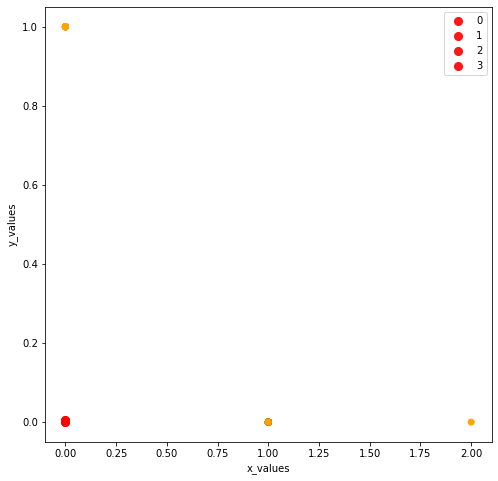

In [70]:

%matplotlib inline
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]

print (colored[0:10])
plt.scatter(cust_prod.iloc[:, 125], cust_prod.iloc[:, -125],  color = colored)

for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()




In [34]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


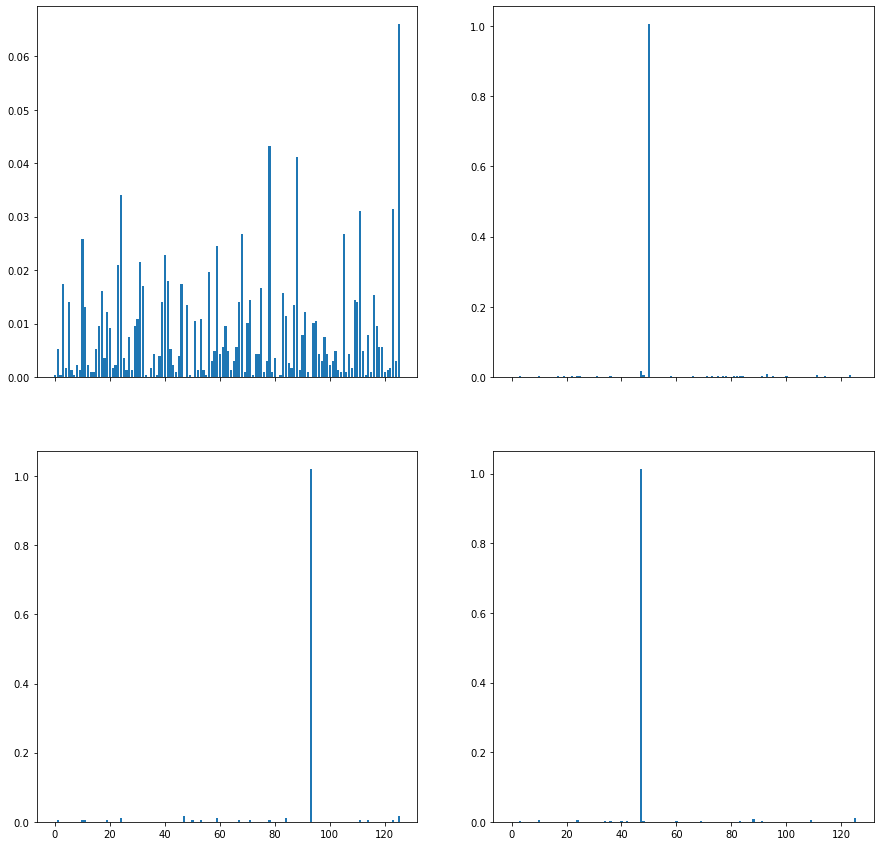

In [35]:
%matplotlib inline
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)

c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)

c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)

c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [36]:
c0.sort_values(ascending=False)[0:10]


aisle
yogurt                           0.066025
milk                             0.043288
packaged cheese                  0.041102
chips pretzels                   0.034106
water seltzer sparkling water    0.031482
soy lactosefree                  0.031045
refrigerated                     0.026672
ice cream ice                    0.026672
bread                            0.025798
frozen produce                   0.024486
dtype: float64

In [40]:
c0.sort_values(ascending=False)[10:15]


aisle
eggs                   0.022737
crackers               0.021425
cereal                 0.020988
frozen meals           0.019676
energy granola bars    0.017927
dtype: float64

In [37]:
c1.sort_values(ascending=False)[0:10]


aisle
fresh vegetables                 1.005797
fresh fruits                     0.017391
packaged vegetables fruits       0.008696
soy lactosefree                  0.005797
water seltzer sparkling water    0.005797
fresh herbs                      0.005797
cleaning products                0.002899
more household                   0.002899
cat food care                    0.002899
nuts seeds dried fruit           0.002899
dtype: float64

In [38]:
c2.sort_values(ascending=False)[0:10]


aisle
packaged vegetables fruits    1.020942
yogurt                        0.015707
fresh fruits                  0.015707
frozen produce                0.010471
oils vinegars                 0.010471
chips pretzels                0.010471
spices seasonings             0.005236
juice nectars                 0.005236
asian foods                   0.005236
milk                          0.005236
dtype: float64

In [39]:
c3.sort_values(ascending=False)[0:10]


aisle
fresh fruits               1.013928
yogurt                     0.011142
packaged cheese            0.008357
soft drinks                0.005571
bread                      0.005571
chips pretzels             0.005571
frozen vegan vegetarian    0.002786
nuts seeds dried fruit     0.002786
fresh herbs                0.002786
energy sports drinks       0.002786
dtype: float64